# Alexander Albon

<img src="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/image.img.1920.medium.jpg/1646750995556.jpg" width="300">

### Team: Williams 

<img src ="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/helmet.img.png/1646824579444.png" width="200">



In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [26]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

alb_laps <- lap_data %>%
            filter(driverId == 848)

# Filtering Lap Data for WILLIAMS
wlms_lap <- lap_data %>%
             filter(driverId %in% c(9, 13, 814, 845, 851))

# Season Analysis

[1] 1052 1045 1011  990  971  949  929  902  883  863  337    4   20   38   53
[16]   73   92

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5824660,97.07766,1.617961


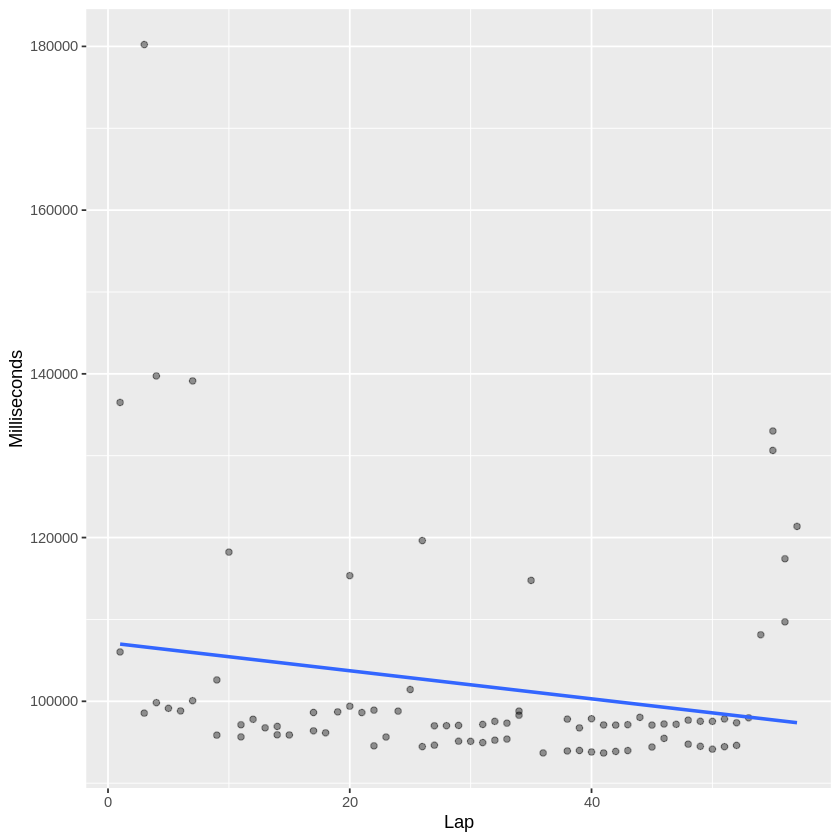

In [4]:
#1. Bahrain 

### UNIQUE DATA

aa_bahrain <- alb_laps %>%
                filter(raceId %in% bahrain_race_ID) 
bahrain_race_ID
aa_bahrain_clean <- aa_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

aa_bahrain_clean_ID <- aa_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_bahrain_races <- alb_laps %>%
                    filter(raceId %in% aa_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5522398,92.03997,1.534


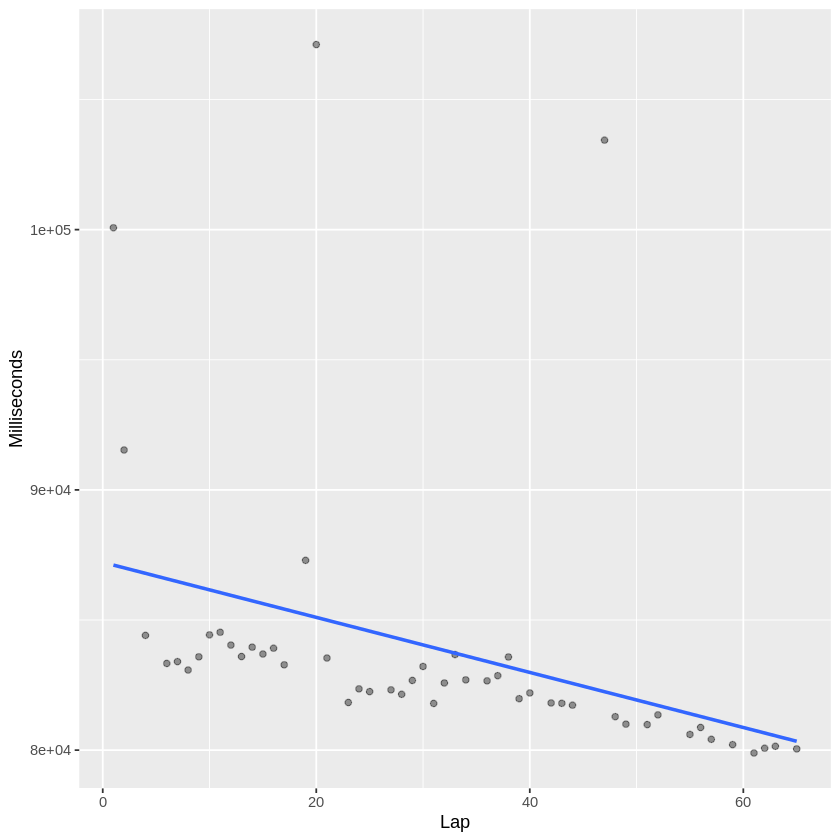

In [5]:
#2. Portimão

aa_Portimão <- alb_laps %>%
                filter(raceId %in% Portimão_race_ID) 

aa_Portimão_clean <- aa_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_Portimão_clean
aa_Portimão_clean_ID <- aa_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_Portimão_races <- alb_laps %>%
                    filter(raceId %in% aa_Portimão_clean_ID) 

formulaone_split <- initial_split(aa_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5266784,87.77973,1.462996


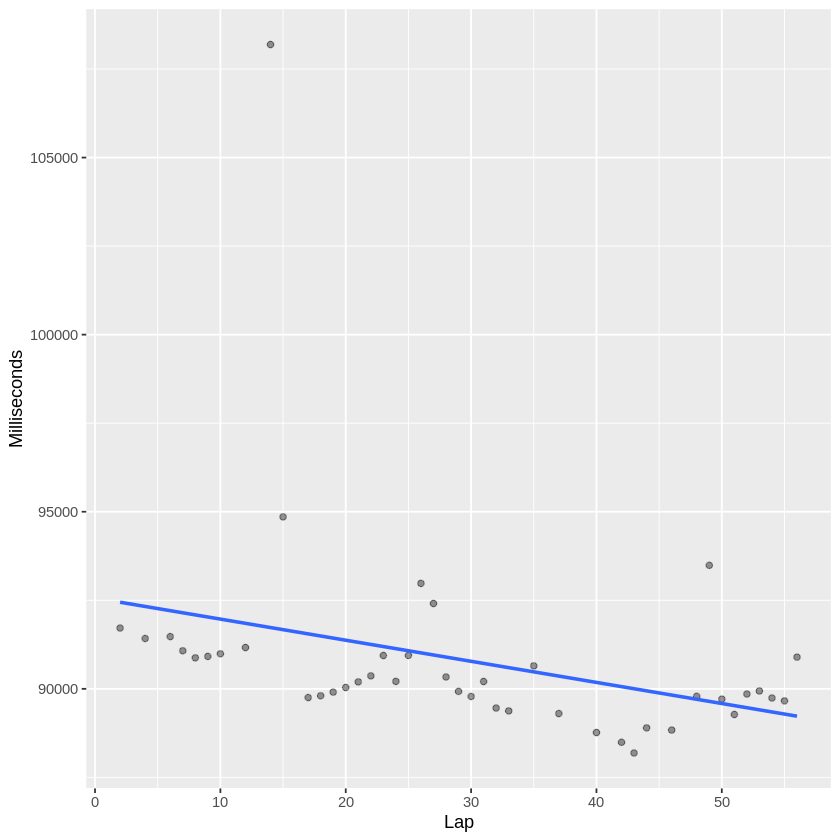

In [6]:
#3. Australia

aa_aus <- alb_laps %>%
                filter(raceId %in% aus_race_ID) 

aa_aus_clean <- aa_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_aus_clean_ID <- aa_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_aus_races <- alb_laps %>%
                    filter(raceId %in% aa_aus_clean_ID)

formulaone_split <- initial_split(aa_aus_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5387417,89.79028,1.496505


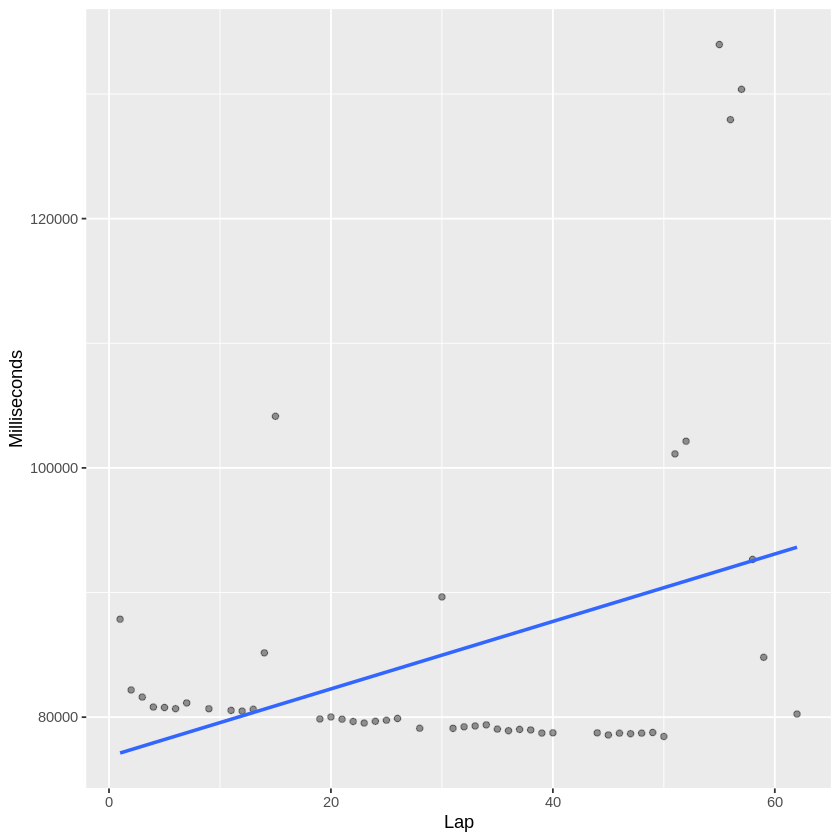

In [7]:
#4. Italy, Imola

aa_imola <- alb_laps %>%
                filter(raceId %in% imola_race_ID) 

aa_imola_clean <- aa_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_imola_clean
aa_imola_clean_ID <- aa_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_imola_races <- alb_laps %>%
                    filter(raceId %in% aa_imola_clean_ID)

formulaone_split <- initial_split(aa_imola_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6111148,101.8525,1.697541


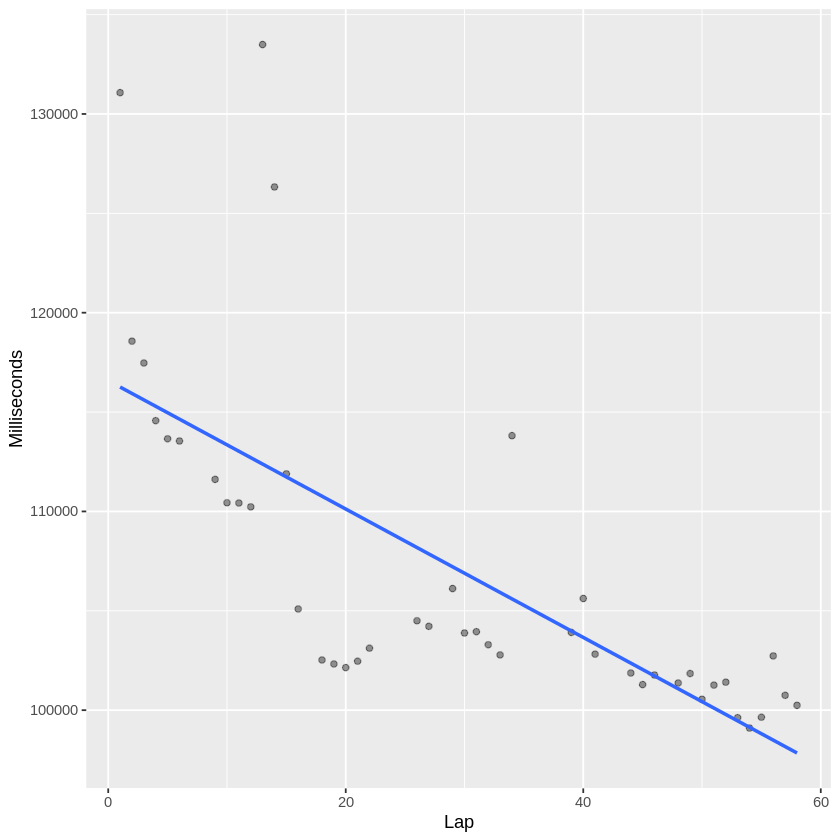

In [8]:
#5. Turkey (Replacing Miami)

aa_turkey <- alb_laps %>%
                filter(raceId %in% turkey_race_ID) 

aa_turkey_clean <- aa_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_turkey_clean
aa_turkey_clean_ID <- aa_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_turkey_races <- alb_laps %>%
                    filter(raceId %in% aa_turkey_clean_ID)

formulaone_split <- initial_split(aa_turkey_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5675548,94.59247,1.576541


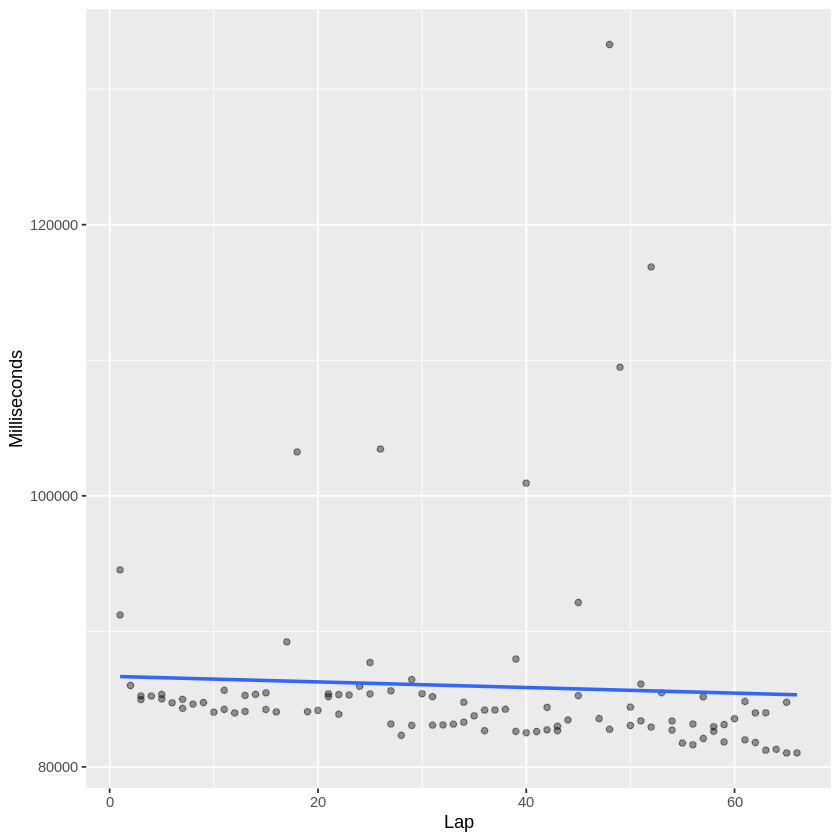

In [9]:
#6. Spain

aa_spain <- alb_laps %>%
                filter(raceId %in% spain_race_ID) 

aa_spain_clean <- aa_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_spain_clean_ID <- aa_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_spain_races <- alb_laps %>%
                    filter(raceId %in% aa_spain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_spain_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,78


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6243243,104.054,1.734234


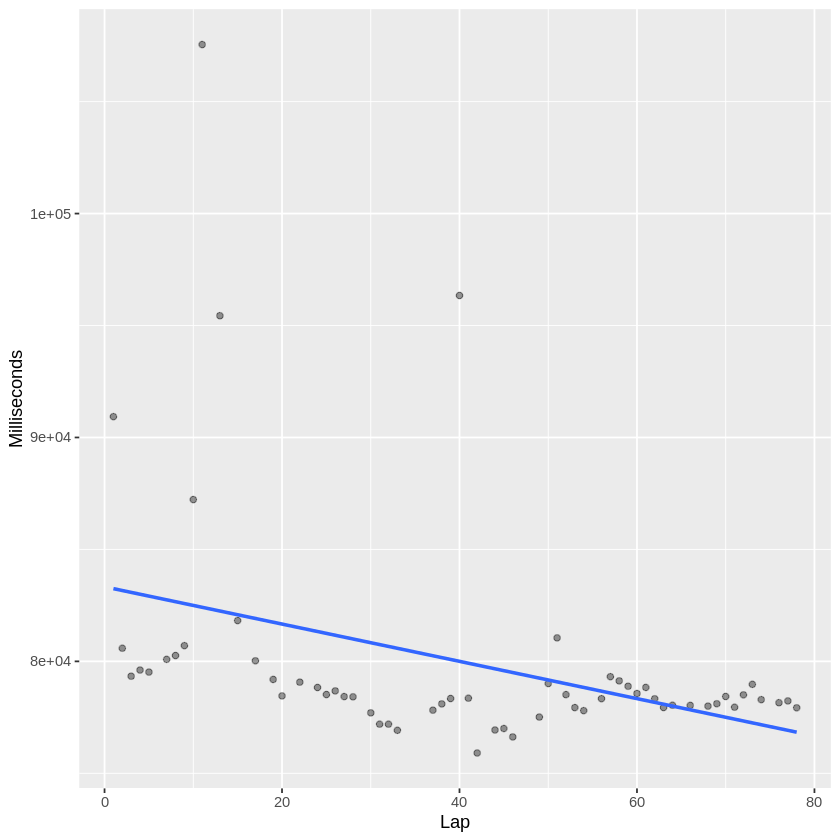

In [10]:
#7. Monaco

aa_monaco <- alb_laps %>%
                filter(raceId %in% monaco_race_ID) 

aa_monaco_clean <- aa_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_monaco_clean
aa_monaco_clean_ID <- aa_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monaco_races <- alb_laps %>%
                    filter(raceId %in% aa_monaco_clean_ID)

formulaone_split <- initial_split(aa_monaco_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5673972,94.56619,1.576103


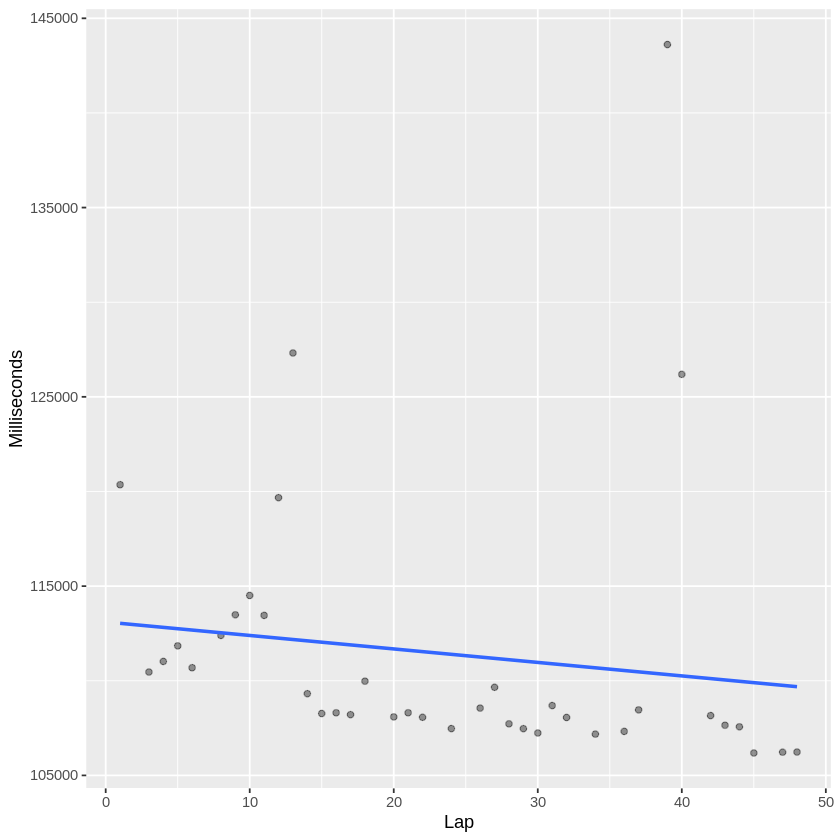

In [11]:
#8. Azerbaijan

aa_azerbaijan <- alb_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

aa_azerbaijan_clean <- aa_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_azerbaijan_clean
aa_azerbaijan_clean_ID <- aa_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_azerbaijan_races <- alb_laps %>%
                    filter(raceId %in% aa_azerbaijan_clean_ID)

formulaone_split <- initial_split(aa_azerbaijan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,59


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5495161,91.58601,1.526434


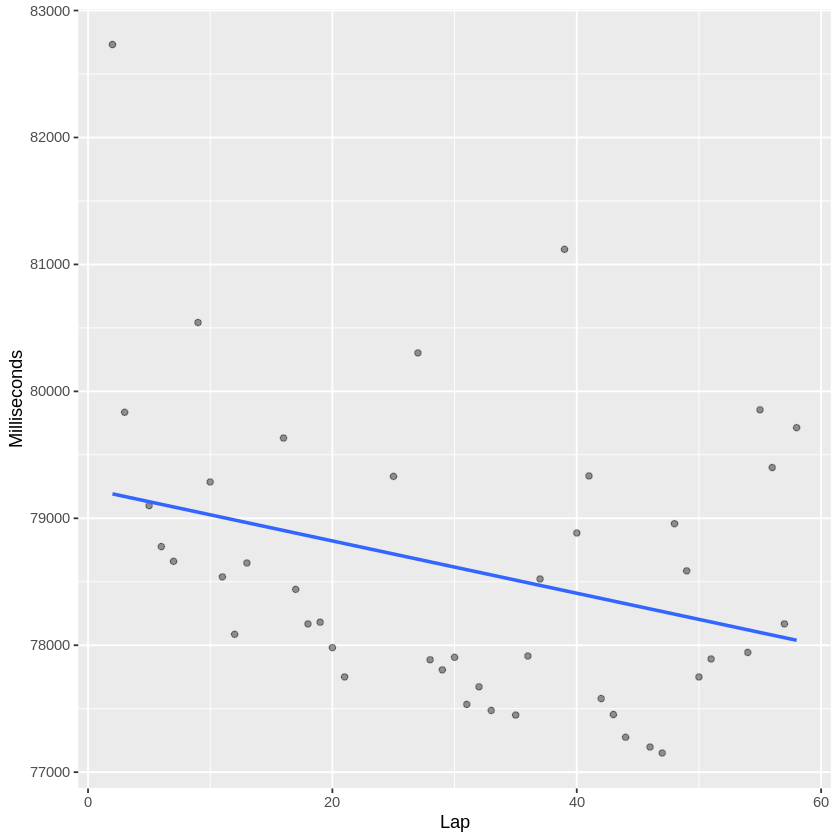

In [12]:
#9. Canada

aa_canada <- alb_laps %>%
                filter(raceId %in% canada_race_ID) 

aa_canada_clean <- aa_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_canada_clean
aa_canada_clean_ID <- aa_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_canada_races <- alb_laps %>%
                    filter(raceId %in% aa_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_canada_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4977001,82.95001,1.3825


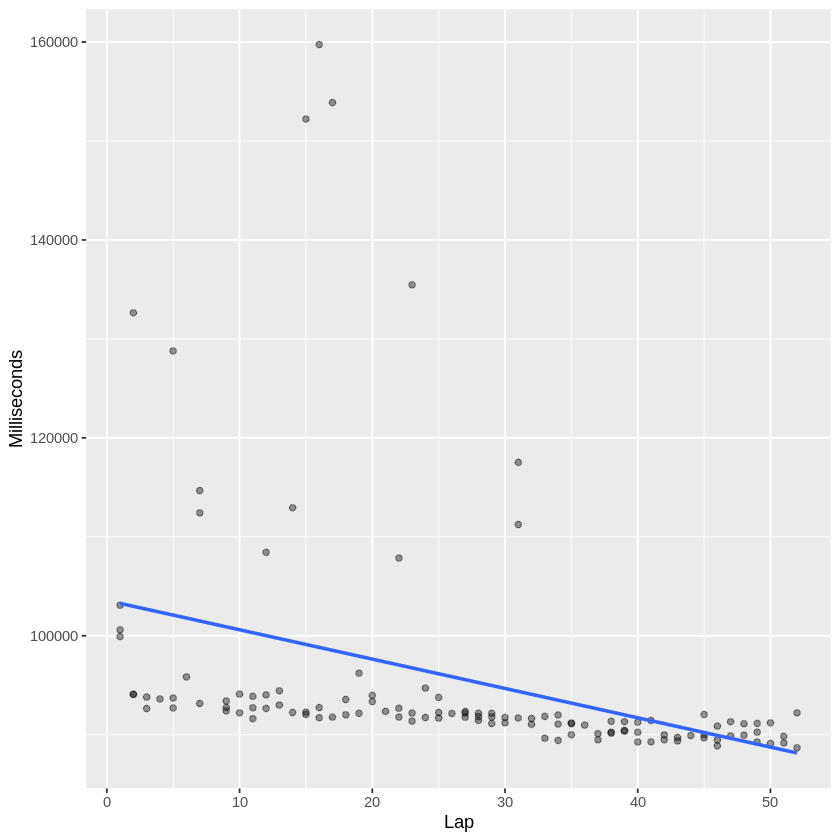

In [13]:
#10. Great Britain

aa_uk <- alb_laps %>%
                filter(raceId %in% uk_race_ID) 

aa_uk_clean <- aa_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uk_clean_ID <- aa_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uk_races <- alb_laps %>%
                    filter(raceId %in% aa_uk_clean_ID)

formulaone_split <- initial_split(aa_uk_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5205407,86.75679,1.445946


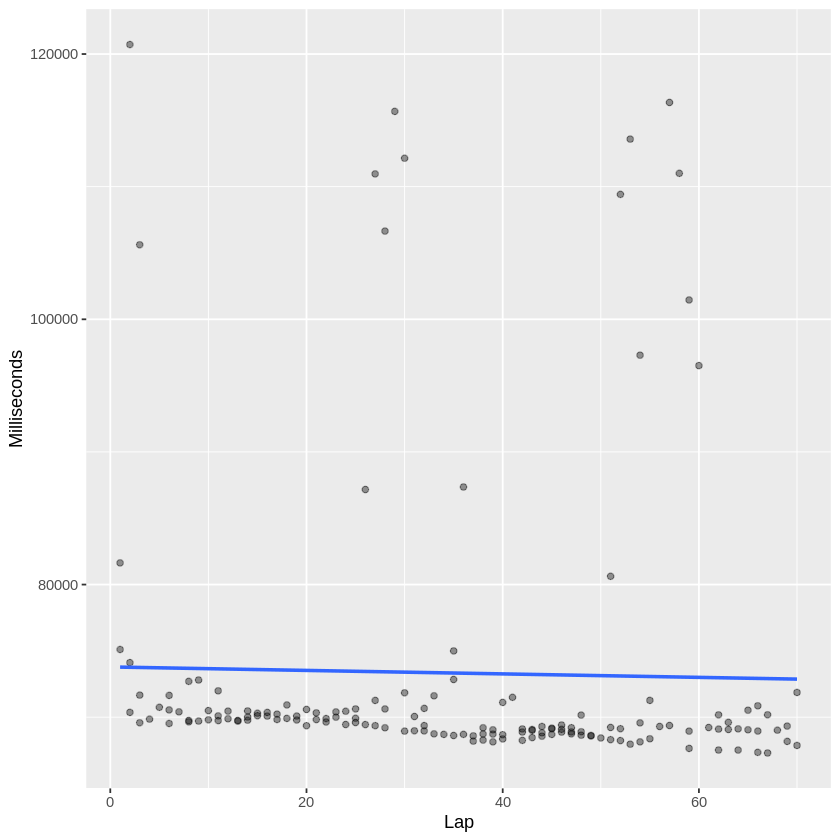

In [14]:
#11. Austria

aa_austria <- alb_laps %>%
                filter(raceId %in% austria_race_ID) 

aa_austria_clean <- aa_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austria_clean_ID <- aa_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austria_races <- alb_laps %>%
                    filter(raceId %in% aa_austria_clean_ID)

formulaone_split <- initial_split(aa_austria_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,52
1017,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5404356,90.0726,1.50121


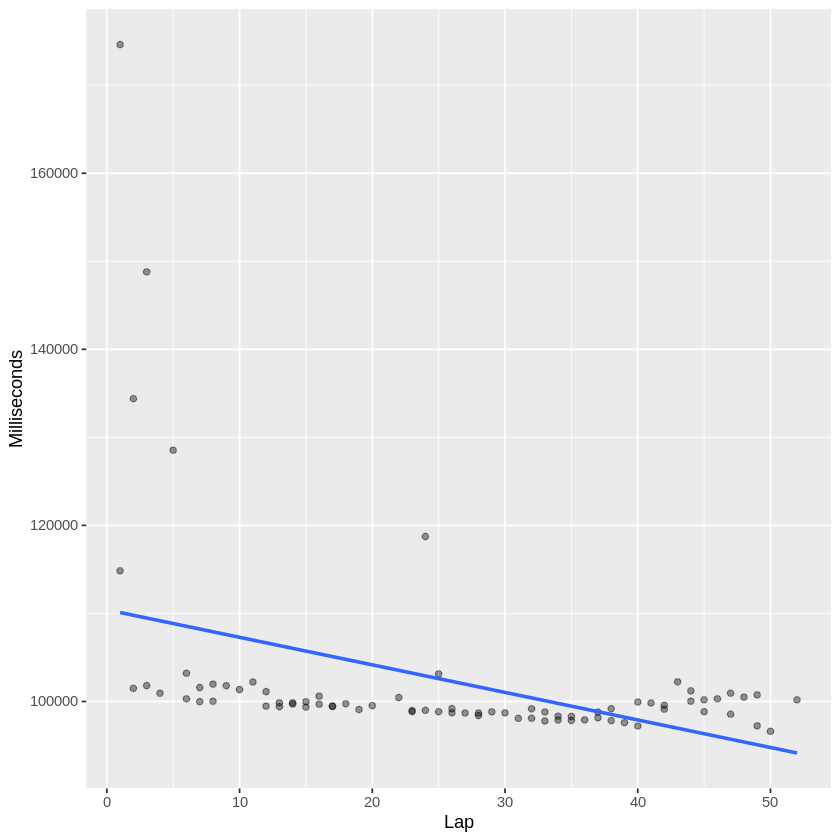

In [27]:
#12. France

aa_france <- wlms_lap %>%
                filter(raceId %in% france_race_ID) 

aa_france_clean <- aa_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_france_clean
aa_france_clean_ID <- aa_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_france_races <- wlms_lap %>%
                    filter(raceId %in% aa_france_clean_ID)

formulaone_split <- initial_split(aa_france_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5848444,97.47407,1.624568


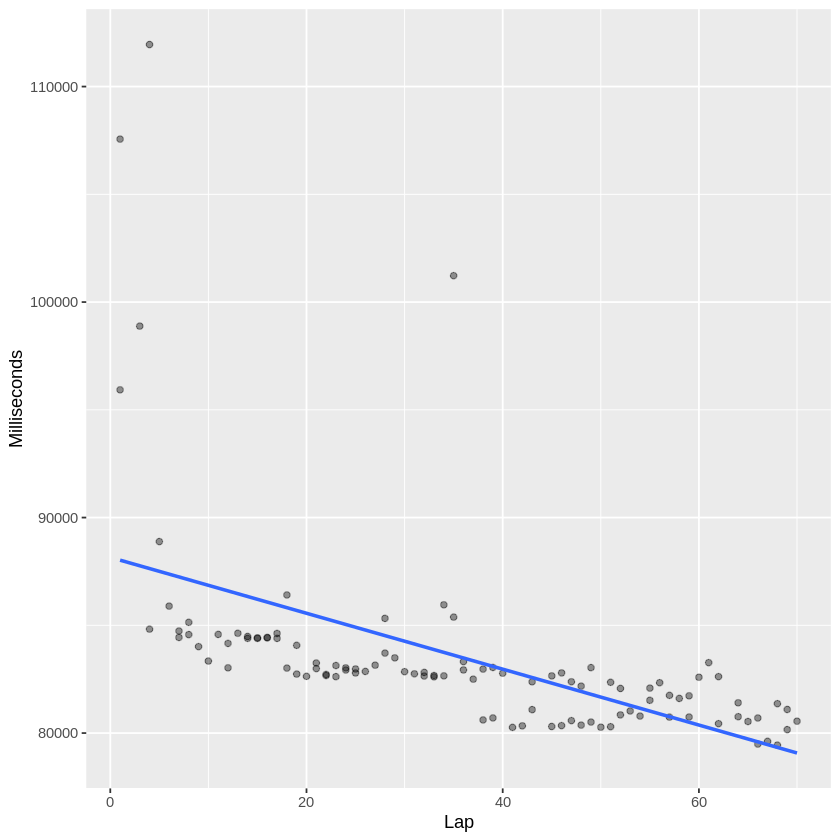

In [16]:
#13.  Hungary

aa_hungary <- alb_laps %>%
                filter(raceId %in% hungary_race_ID) 

aa_hungary_clean <- aa_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

aa_hungary_clean_ID <- aa_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_hungary_races <- alb_laps %>%
                    filter(raceId %in% aa_hungary_clean_ID)

formulaone_split <- initial_split(aa_hungary_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
30,88
49,88
349,88
852,88
871,88
891,70
12,44
103,44
911,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5203930,86.73216,1.445536


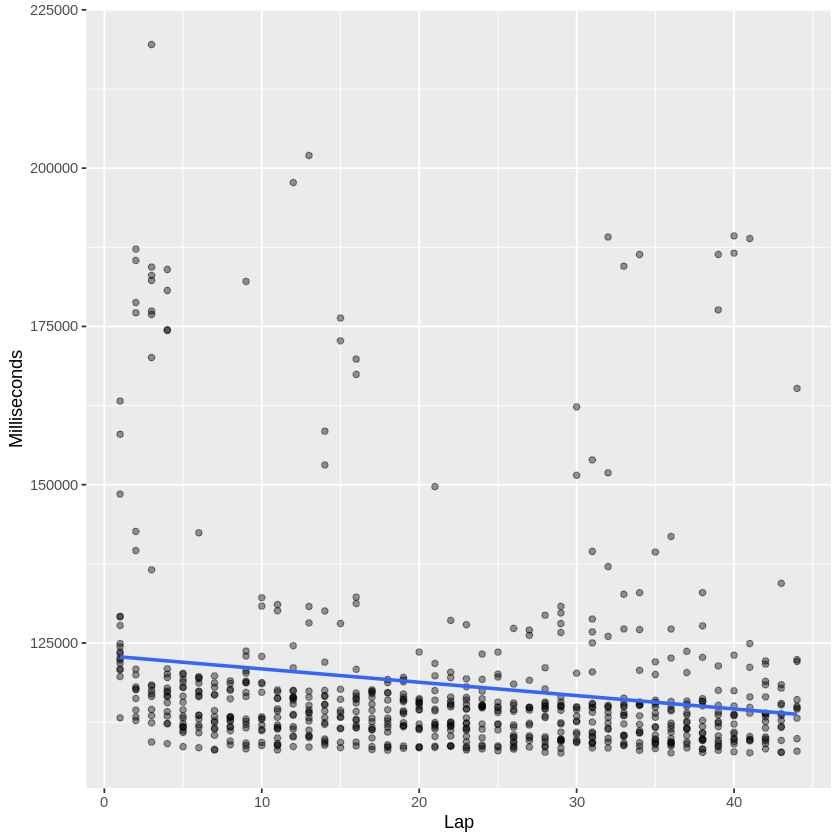

In [46]:
#14. Belgium

aa_belgium <- wlms_lap %>%
                filter(raceId %in% belgium_race_ID) 

aa_belgium_clean <- aa_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_belgium_clean
aa_belgium_clean_ID <- aa_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_belgium_races <- wlms_lap %>%
                    filter(raceId %in% aa_belgium_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_belgium_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5622485,93.70809,1.561801


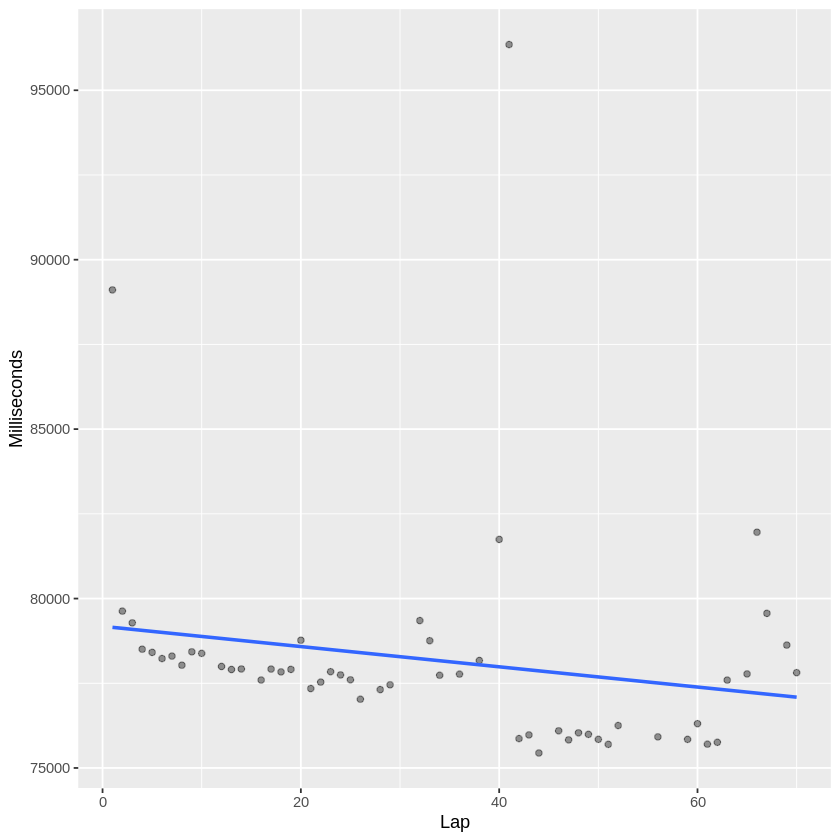

In [45]:
#15. Netherlands

aa_netherlands <- wlms_lap %>%
                filter(raceId %in% netherlands_race_ID) 

aa_netherlands_clean <- aa_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_netherlands_clean
aa_netherlands_clean_ID <- aa_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_netherlands_races <- wlms_lap %>%
                    filter(raceId %in% aa_netherlands_clean_ID)

formulaone_split <- initial_split(aa_netherlands_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1023,53
1038,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4678996,77.98326,1.299721


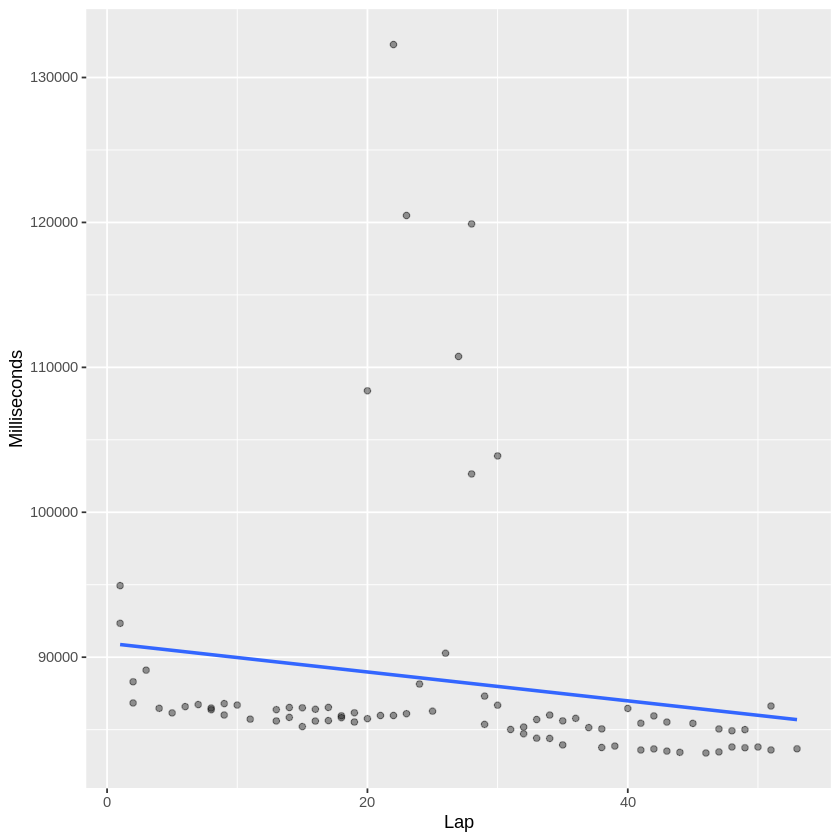

In [32]:
#16. Italy, Monza

aa_monza <- alb_laps %>%
                filter(raceId %in% monza_race_ID) 

aa_monza_clean <- aa_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
aa_monza_clean
aa_monza_clean_ID <- aa_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monza_races <- alb_laps %>%
                    filter(raceId %in% aa_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(aa_monza_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7107484,118.4581,1.974301


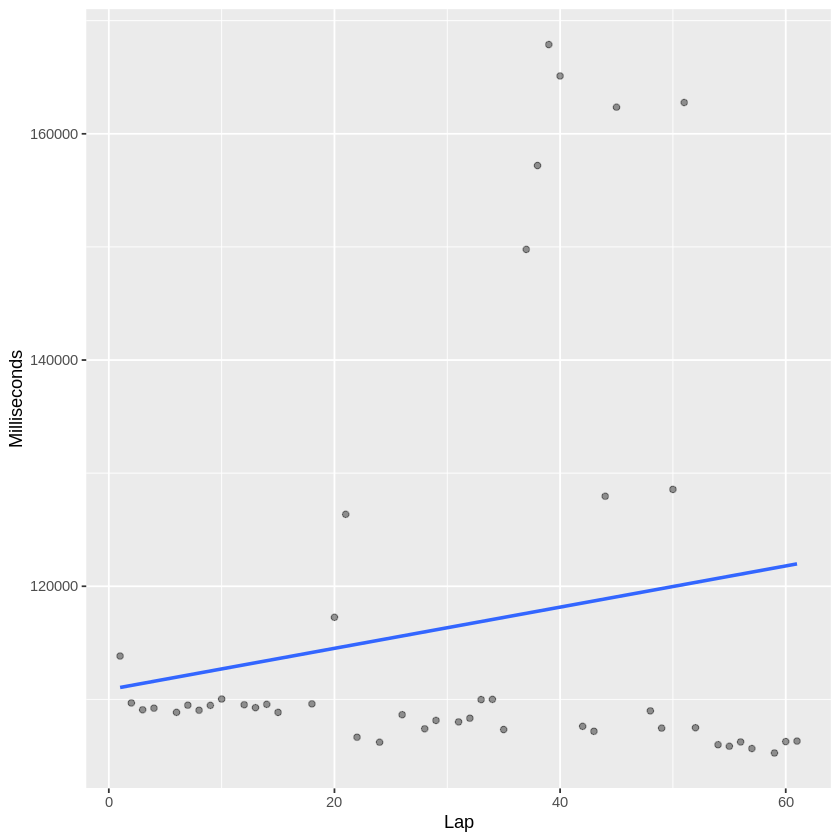

In [20]:
#17. Singapore

aa_singapore <- alb_laps %>%
                filter(raceId %in% singapore_race_ID) 

aa_singapore_clean <- aa_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_singapore_clean_ID <- aa_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_singapore_races <- alb_laps %>%
                    filter(raceId %in% aa_singapore_clean_ID)

formulaone_split <- initial_split(aa_singapore_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5073425,84.55708,1.409285


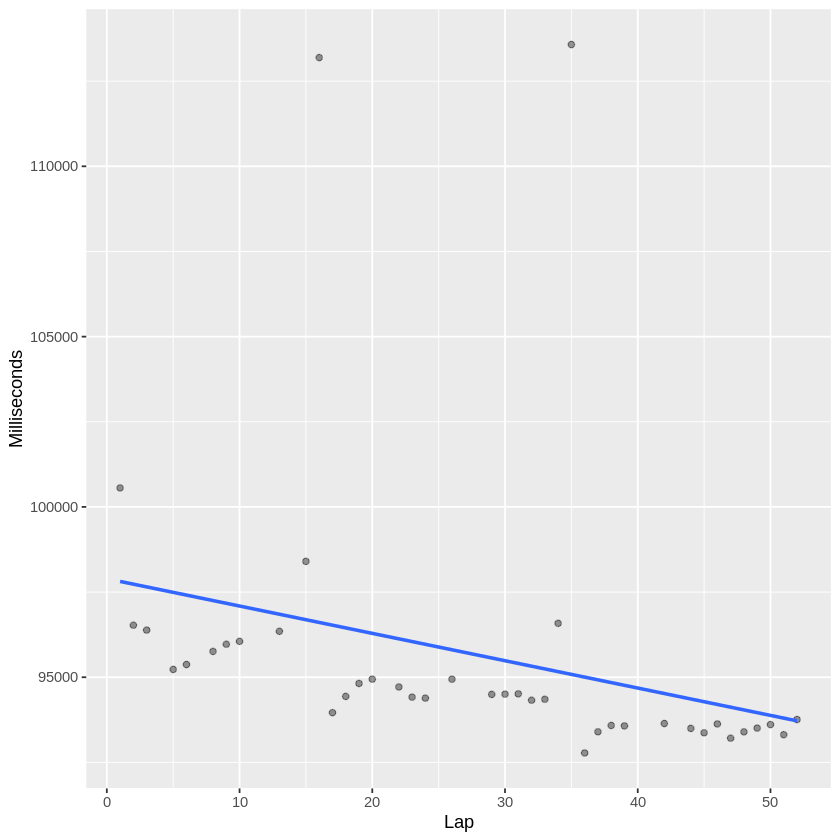

In [21]:
#18. Japan

aa_japan <- alb_laps %>%
                filter(raceId %in% japan_race_ID) 

aa_japan_clean <- aa_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_japan_clean_ID <- aa_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_japan_races <- alb_laps %>%
                    filter(raceId %in% aa_japan_clean_ID)

formulaone_split <- initial_split(aa_japan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5704881,95.08135,1.584689


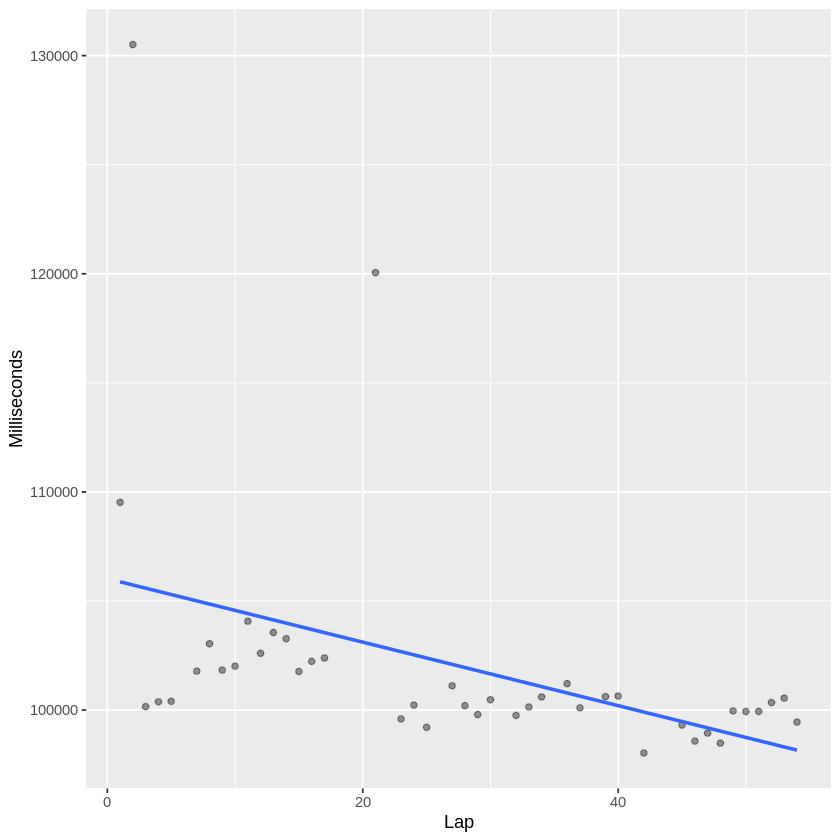

In [22]:
#19. USA, Austin

aa_austin <- alb_laps %>%
                filter(raceId %in% austin_race_ID) 

aa_austin_clean <- aa_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austin_clean_ID <- aa_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austin_races <- alb_laps %>%
                    filter(raceId %in% aa_austin_clean_ID)

formulaone_split <- initial_split(aa_austin_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5822305,97.03841,1.617307


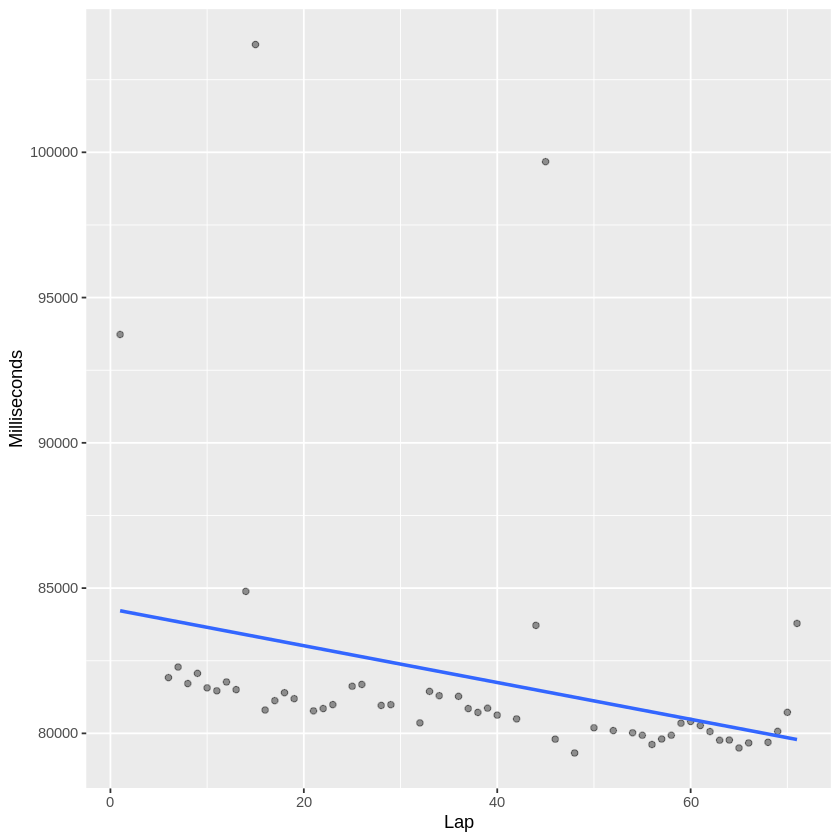

In [44]:
#20. Mexico

aa_mexico <- alb_laps %>%
                filter(raceId %in% mexico_race_ID) 

aa_mexico_clean <- aa_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_mexico_clean_ID <- aa_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_mexico_races <- alb_laps %>%
                    filter(raceId %in% aa_mexico_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_mexico_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5900228,98.33713,1.638952


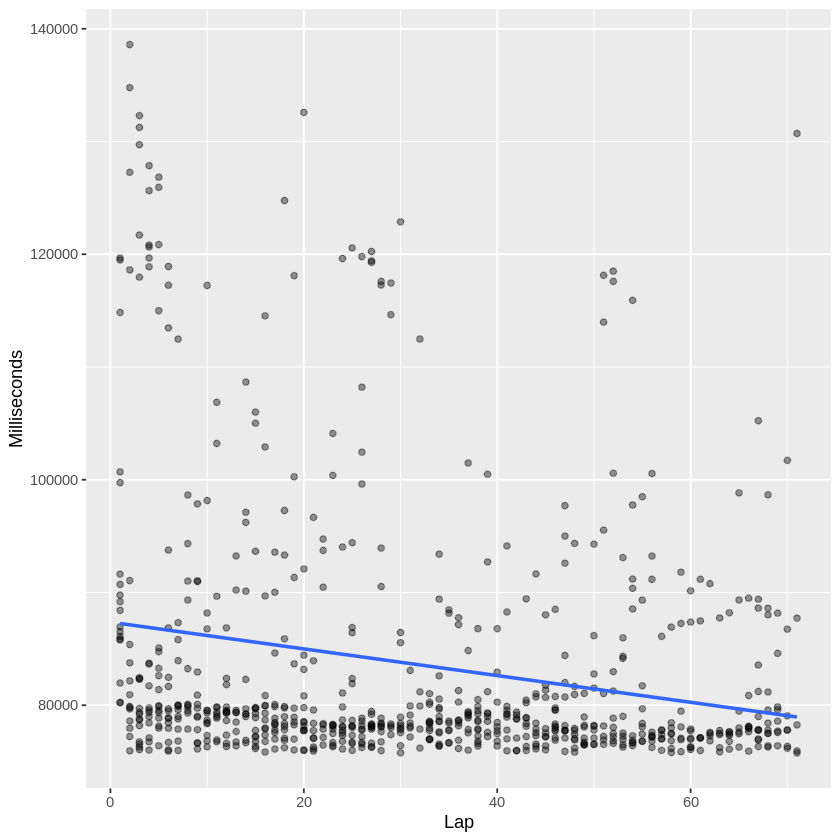

In [43]:
#21. Brazil

aa_brazil <- wlms_lap %>%
                filter(raceId %in% brazil_race_ID) 

aa_brazil_clean <- aa_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_brazil_clean_ID <- aa_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_brazil_races <- wlms_lap %>%
                    filter(raceId %in% aa_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(aa_brazil_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

#initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6036747,100.6125,1.676874


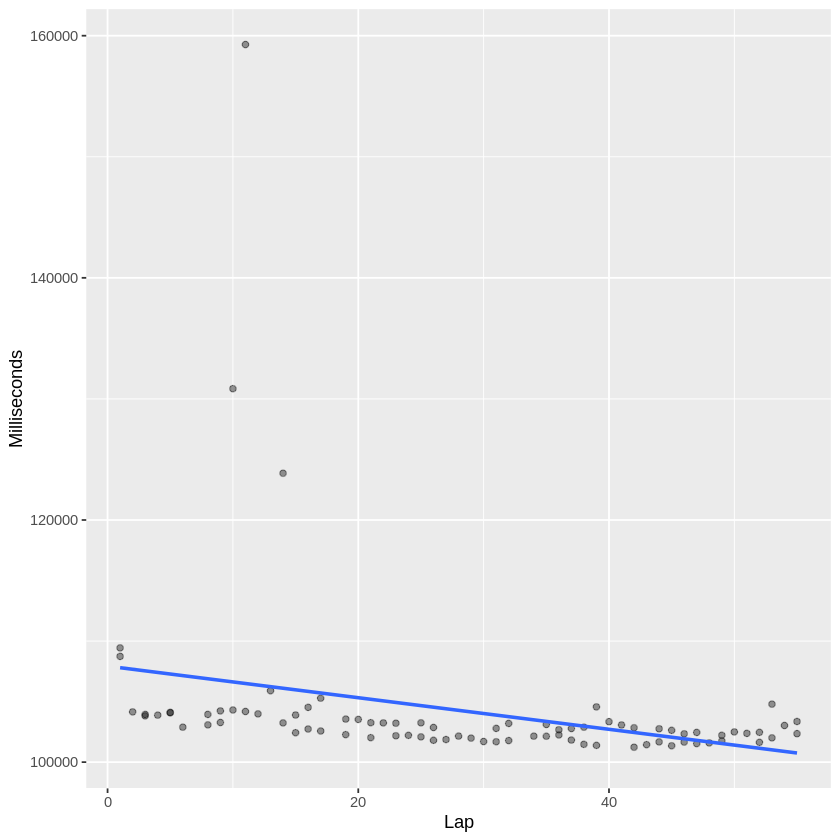

In [25]:
#22. Abu Dhabi

aa_uae <- alb_laps %>%
                filter(raceId %in% uae_race_ID) 

aa_uae_clean <- aa_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uae_clean_ID <- aa_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uae_races <- alb_laps %>%
                    filter(raceId %in% aa_uae_clean_ID)

formulaone_split <- initial_split(aa_uae_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction ()